**Book Reccomendation system: Henrik Krosi**

In [ ]:
# Librarit qe kam perdorur
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Hap datasetin tim per Netflix
url = '/content/netflix_titles.csv'

Netflix = pd.read_csv(url)
# Shikoj 5 rreshtat e par per testim qe punon
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Shfaq dimensionet e datasetit
print("Dimensions of the dataset:")
# Numri i rreshtave
print("Number of rows:", Netflix.shape[0])
# Numri i collonave
print("Number of columns:", Netflix.shape[1])

Dimensions of the dataset:
Number of rows: 8807
Number of columns: 12


In [ ]:
# Me metoden Info() shfaq informacion gjeneral per datasetin
print("Information about the dataset:")
print(Netflix.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


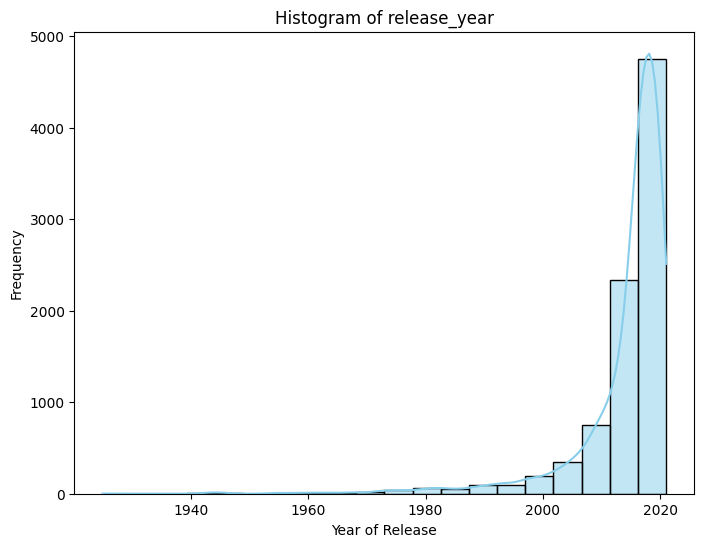

In [ ]:
# Krijoj nje Histogram te thjesht se ne ca viti jan leshuar programet e netflixit dhe frequenca e tyre per cdo vit
columns_to_visualize = ['release_year', 'duration', 'rating'] #<-Mungonte ky rreshti qe par prandaj nuk punoi dje

# Shfaqja e Histogramit
for column in columns_to_visualize:
    if Netflix[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(Netflix[column], bins=20, color='skyblue', kde=True)
        plt.title('Histogram of ' + column)
        plt.xlabel('Year of Release')
        plt.ylabel('Frequency')
        plt.show()



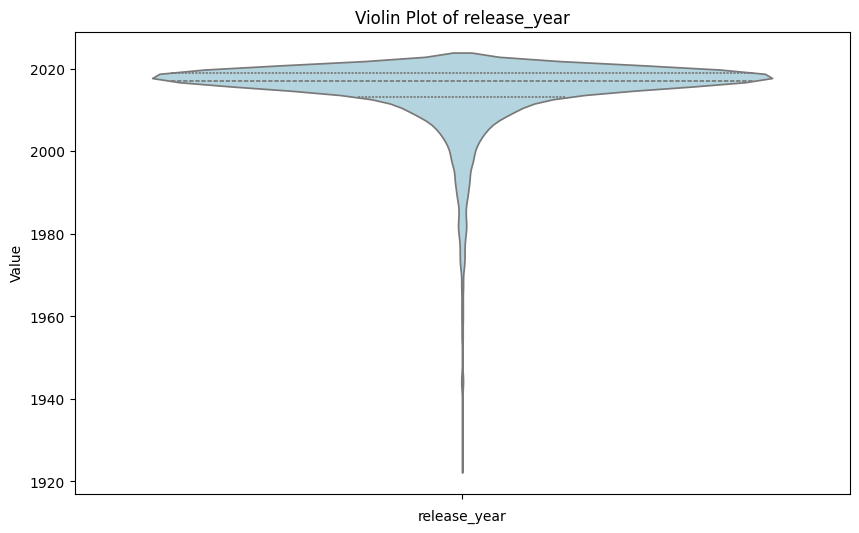

In [33]:
# Graf Violin qe tregon po te njejten gje me histogramin
numerical_column = 'release_year'

plt.figure(figsize=(10, 6))
sns.violinplot(data=Netflix[numerical_column], color='lightblue', inner='quartile')
plt.title('Violin Plot of ' + numerical_column)
plt.xlabel(numerical_column)
plt.ylabel('Value')
plt.show()



<ipython-input-34-cb82ae6f56ea>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Netflix[column].value_counts().reset_index(), x='index', y=column, palette='viridis')


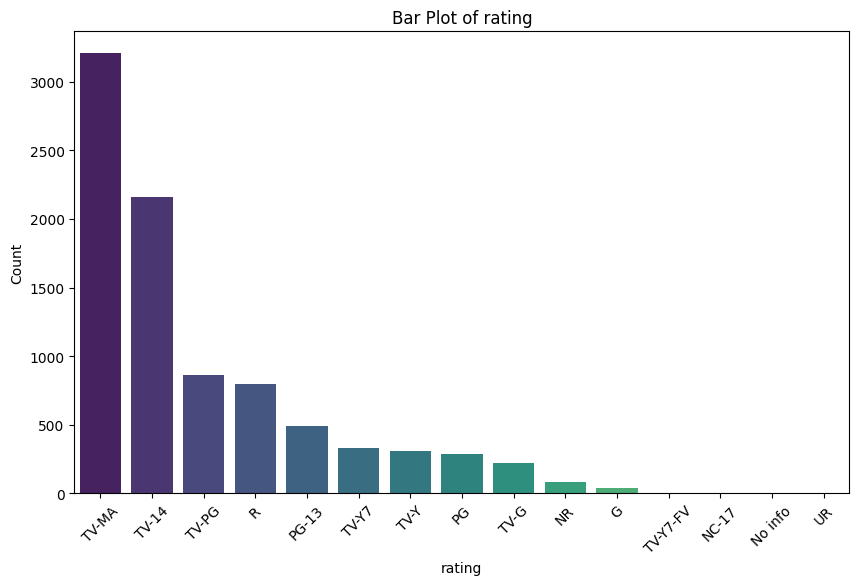

In [34]:
# Bar plot qe tregon numrin e ratingve per cdo program
column = 'rating'

### (Do i thuash profesorin qe nuk e ke qe nuk ishin njesoj formati i datave prandaj ke shtuar nje funksion per ta rreguluar)

# Funksion qe me rregullon kollonen rating
def clean_rating(value):
  # Meqenese gabimi i vetem ne graf qendronte se kishin vlera qe tregonin kohen ne minuta
  # Un krijoj nje koman IF te thjesht qe kontrollon nese vlera e marr ka numer dhe "min" pra nese vlera esht ne minuta ne vend qe te jet rating normal
    if isinstance(value, str) and value[0].isdigit() and 'min' in value:
        return 'No info'
    return value
    # Nese kuhsti plotesohet e zevendesojn vleren me "No info"
    # Nuk zgjodha ti klasifikoj si NR (not rated) meqenese ai ne vetvete esht prap rating normal
    # Kurse ne kete rast nuk e di se cfar rating mund te kishte programi prandaj po e cuj si thjesht skemi informacion

# E thirrim ate funksion ne datasetin ton per te pastruar kollonen
Netflix[column] = Netflix[column].map(clean_rating)

# Pastaj krijojm grafin Bar Plot normalisht
plt.figure(figsize=(10, 6))
sns.barplot(data=Netflix[column].value_counts().reset_index(), x='index', y=column, palette='viridis')
plt.title('Bar Plot of ' + column)
plt.xlabel(column)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Vlerat qe kan "TV" perpara tyre jan per programe qe transmetohen ne Televizor
# kurse te tjerat si R, PG-13 etj jan per filma qe jepen ne kinema ose shiten ne DvD

# TV-MA	: (Mature-Audience) per Audienc te rritur
# TV-14	: (Parents Strongly Cautiend) filmi/seriali mund te ket permbajtje qe nuk jan te pershtatshme per femij deri ne 14 vjec
# TV-PG	: (Paretal Guidance Suggested) keshillohet mbikqyrja e prinderve
# R     : (Restricted) filmi/seriali esht i pershtatshem vetem per te rritur
# PG-13	: I njejt si TV-14 po per femij nen 13 vjec
# TV-Y7	: (Directed to Older Children) filmi/seriali esht krijuar per mosha nga 7 dhe lart
# PG	  : (Parental Guidance Suggested) e keshillueshme qe prinderit te shoqerojn femijet e tyre nese duan te shikojn
# TV-G	: (General Audience), programi esht i vlefshem per te gjith moshat
# NR    : (Not Rated), programi nuk ka vlersim

In [ ]:
# Krijoj nje kolon qe numeron ne sa zhanra futet nje program
Netflix['genre_count'] = Netflix['listed_in'].apply(lambda x: len(x.split(',')))
Netflix['country_diversity'] = Netflix['country'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre_count,country_diversity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,3,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,3,1


<Figure size 1000x600 with 0 Axes>

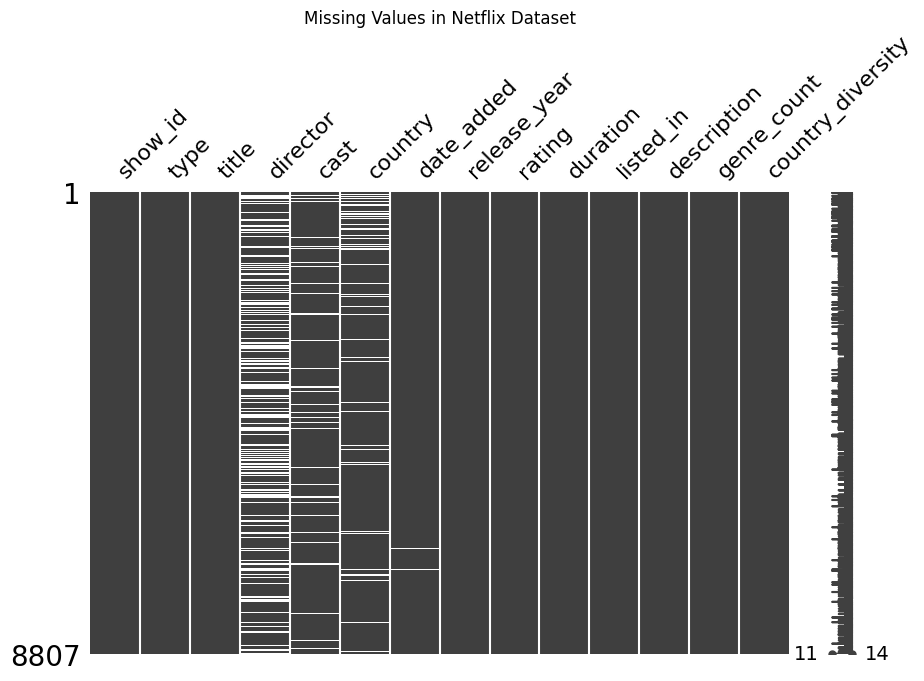

In [ ]:
# Gjendja me vlera qe mungojn
import missingno as msno

plt.figure(figsize=(10, 6))
msno.matrix(Netflix, figsize=(10, 6))
plt.title('Missing Values in Netflix Dataset')
plt.show()

<Figure size 1000x600 with 0 Axes>

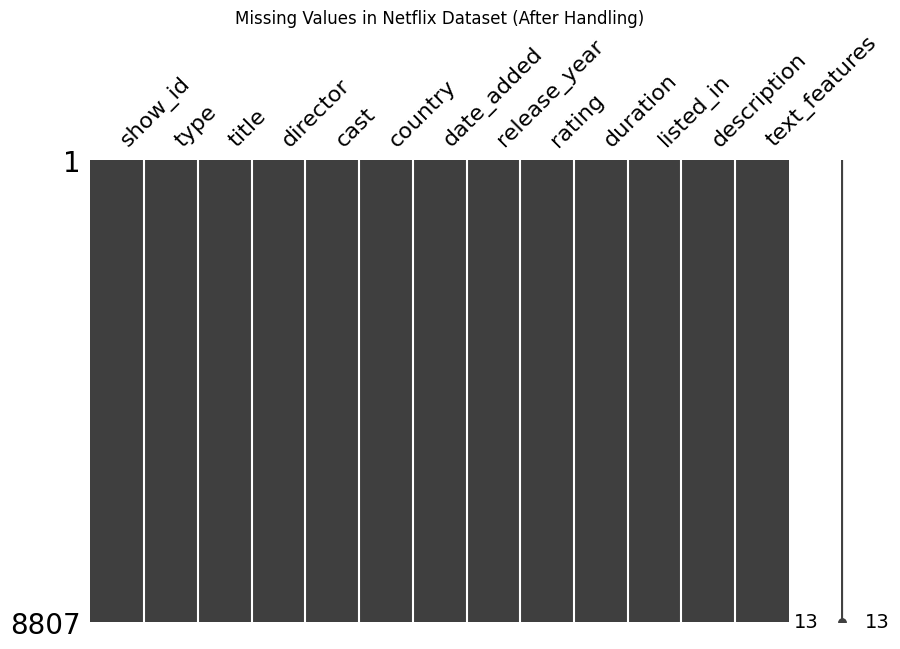

In [ ]:
# Vedosa ti zevendesoj ato vlera qe mungojn me string "No info"
# Pasi paraprakisht nga dataseti mungojn vlera si stringje per diktorin, kastin, shtetin etj
# Keshtu qe mund vetem ti zevendesoja me nje string tjeter se nuk bejm dot veprime te tjera dhe vlerat qe mungojn jan shum te shumta per ti ber drop dhe perkojn vetem ne disa kollona specifike
Netflix.fillna("No info", inplace=True)

# Vizualizoj vlerat qe mungojn prap si mepar per te provuar qe i kemi plotsuar vlerat
plt.figure(figsize=(10, 6))
msno.matrix(Netflix, figsize=(10, 6))
plt.title('Missing Values in Netflix Dataset (After Handling)')
plt.show()

In [ ]:
### ( #Per siguri nese te kthen error qeliza e fundik ku ke algoritmin per te rekomanduar, beji run ksaj qelize ktu )

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

# Features to use for content-based filtering

features = ['title', 'director', 'cast', 'country', 'listed_in', 'description']

# Bashkoj text features ne nje string te vetme
Netflix['text_features'] = Netflix[features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# IInicizlizoj Vektorizuesin
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Bej fit atyre featureave ne tekst
tfidf_matrix = tfidf_vectorizer.fit_transform(Netflix['text_features'])

# Gjej cosine simularity Matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Funksioni qe rekomandon filmat, me parameter titullin qe jepet nga uzeri dhe matrixen kosinuse qe esht default she gjendet me para
def recommend_similar(title, cosine_sim=cosine_sim):
    # Gjej indeksin e titullit te programit qe esht marr si parameter dhe e ka shkru
    idx = Netflix.index[Netflix['title'] == title].tolist()[0]

    # Gjej pairwsie similarity per cdo program
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Renditi pogramet ne baz te ketyre pikeve
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Merr 10 me te ngjajshmit
    sim_scores = sim_scores[1:11]

    # Gjej indekset e ketyre programeve
    movie_indices = [i[0] for i in sim_scores]

    # Ktheji
    return Netflix['title'].iloc[movie_indices]

# Shembull i thjesht
recommendations = recommend_similar('Stranger Things')
print(recommendations)


5200    Beyond Stranger Things
1127          Prank Encounters
3398                       Eli
4809             Kiss Me First
2190      The Umbrella Academy
1396                 Homefront
1335                The Sinner
1240                Safe Haven
964        Things Heard & Seen
2600                Good Witch
Name: title, dtype: object
